<a href="https://www.kaggle.com/code/lrntszab/fruit-classification-with-pytorch?scriptVersionId=174182297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install Datumaro for dataset preprocess

In [1]:
!pip install datumaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 M

# Remove done from the dir names

In [2]:
import shutil

source_dir = '/kaggle/input/fruits-dataset-for-classification'
destination_dir = '/kaggle/working/fruits-dataset-for-classification'

shutil.copytree(source_dir, destination_dir)

'/kaggle/working/fruits-dataset-for-classification'

In [3]:
import os

base_dir = '/kaggle/working/fruits-dataset-for-classification'
for dir in os.listdir(base_dir):
    new_name = dir.rsplit('_', 1)[0]
    old_path = os.path.join(base_dir, dir)
    new_path = os.path.join(base_dir, new_name)
    os.rename(old_path, new_path)

# Class Distribution

In [4]:
data_path = '/kaggle/working/fruits-dataset-for-classification'
class_counts= {}

for class_label in os.listdir(data_path):
    class_path = os.path.join(data_path, class_label)
    number_of_images = len(os.listdir(class_path))
    class_counts[class_label] = number_of_images
    
for class_name, counts in class_counts.items():
    print(f"Class: {class_name}, Number of images: {counts}\n")

Class: rotten_pomegranates, Number of images: 250

Class: rotten_peaches, Number of images: 343

Class: rotten_strawberries, Number of images: 251

Class: fresh_peaches, Number of images: 250

Class: fresh_strawberries, Number of images: 250

Class: fresh_pomegranates, Number of images: 311



**Plot the class distribution**

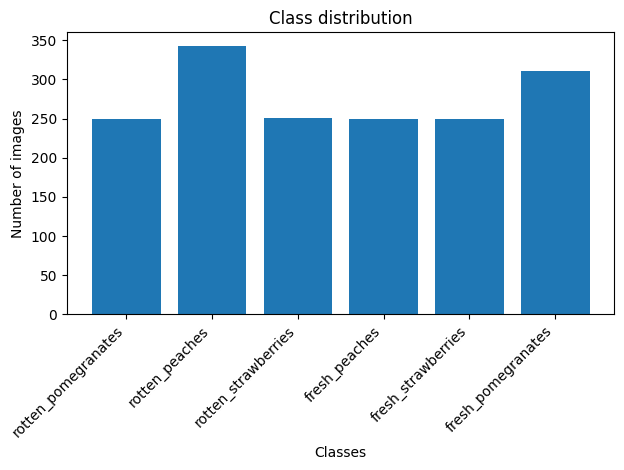

In [5]:
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Class distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Class visualization

In [6]:
dict_for_five_item_in_each_class ={}

data_path = '/kaggle/working/fruits-dataset-for-classification'
for class_label in os.listdir(data_path):
    class_path = os.path.join(data_path, class_label)
    items_paths = []
    for idx, item in enumerate(os.listdir(class_path)):
        if idx < 5:
            items_paths.append(os.path.join(class_path, item))
    dict_for_five_item_in_each_class[class_label] = items_paths
    
print(dict_for_five_item_in_each_class) 

{'rotten_pomegranates': ['/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_120.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_106.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_213.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_153.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_61.jpg'], 'rotten_peaches': ['/kaggle/working/fruits-dataset-for-classification/rotten_peaches/rotten_peach_9.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_peaches/rotten_peach_231.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_peaches/rotten_peach_99.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_peaches/rotten_peach_15.jpg', '/kaggle/working/fruits-dataset-for-classification/rotten_peaches/rotten_peach_299.jpg'], 'rotten_strawb

**Plot 5 images from each class for inspection**

In [7]:
import PIL

for class_labels, image_paths in dict_for_five_item_in_each_class.items():
    plt.figure(figsize=(15, 3))
    for i, image_path in enumerate(image_paths):
        try:
            img = PIL.Image.open(image_path)
            plt.subplot(1, len(image_paths), i + 1)
            plt.imshow(img)
            plt.title(class_labels)
            plt.axis('off')
        except PIL.UnidentifiedImageError as e:
            print(f"Error in file {image_path}: {e}")

plt.tight_layout() 
plt.show()

Error in file /kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_120.jpg: cannot identify image file '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_120.jpg'
Error in file /kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_106.jpg: cannot identify image file '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_106.jpg'
Error in file /kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_213.jpg: cannot identify image file '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_213.jpg'
Error in file /kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_153.jpg: cannot identify image file '/kaggle/working/fruits-dataset-for-classification/rotten_pomegranates/rotten_pomegranate_153.jpg'
Error in file /kaggle/working/fruits-dataset-for

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

# Define config parameters

In [8]:
import torch

DATA_PATH = '/kaggle/working/fruits-dataset-for-classification'
BATCH_SIZE = 4
INPUT_SIZE = 224
NUMBER_OF_CLASSES = 6

NUMBER_OF_EPOCHS = 50
LR = 0.0001
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load the data

In [9]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

import datumaro as dm
from datumaro.plugins.framework_converter import FrameworkConverter

import os

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((INPUT_SIZE,INPUT_SIZE), antialias = True),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
#     transforms.GaussianBlur(),
    transforms.RandomRotation(degrees=30),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((INPUT_SIZE, INPUT_SIZE))
])


def get_dataloaders():
    
    torch.manual_seed(1)

#     full_dataset = datasets.ImageFolder(DATA_PATH, transform=train_transfroms)
    class_labels = os.listdir(DATA_PATH)
    class_labels.sort()

    dm_dataset = dm.Dataset.import_from('/kaggle/working/fruits-dataset-for-classification')
    dm_dataset.transform("random_split", splits=[("train", 0.7), ("val", 0.2), ("test", 0.1)])
    print(dm_dataset)
    

    multi_framework_dataset = FrameworkConverter(dm_dataset, subset="train", task="classification")
    train_dataset = multi_framework_dataset.to_framework(
    framework="torch", transform=train_transform
    )

    multi_framework_dataset = FrameworkConverter(dm_dataset, subset="val", task="classification")
    val_dataset = multi_framework_dataset.to_framework(
    framework="torch", transform=train_transform
    )
    
    multi_framework_dataset = FrameworkConverter(dm_dataset, subset="test", task="classification")
    test_dataset = multi_framework_dataset.to_framework(
    framework="torch", transform=test_transform)

    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    print(len(train_dataset))
    print(len(val_dataset))
    print(len(test_dataset))

    return train_dataloader, val_dataloader, test_dataloader, class_labels, dm_dataset
    


#     val_test_size = int(0.3 * len(full_dataset))
#     train_size = len(full_dataset) - val_test_size

#     train_dataset, val_test_dataset = random_split(full_dataset, [train_size, val_test_size])

#     test_size = int(0.3 * len(val_test_dataset))
#     val_size = len(val_test_dataset) - test_size

#     val_dataset, test_dataset = random_split(val_test_dataset, [val_size, test_size])

#     print(f'Train size: {len(train_dataset)}')
#     print(f'Val size: {len(val_dataset)}')
#     print(f'Test size: {len(test_dataset)}')

#     train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
#     val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
#     test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

#     return train_dataloader, val_dataloader, test_dataloader, class_labels

2024-04-26 17:36:19.735047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 17:36:19.735152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 17:36:19.859309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Model saving and loading

In [10]:
def save_model(save_directory, model,  number_of_epochs, additional_text='', augmentation=''):
    os.makedirs(save_directory, exist_ok=True)
    model_name = model.__class__.__name__

    torch.save(model.state_dict(), os.path.join(save_directory, f"{model_name}{additional_text}_model_epochs_{number_of_epochs}{augmentation}.pth"))


def load_model(load_directory, model, number_of_epochs, additional_text='', augmentation=''):
    model_name = model.__class__.__name__

    model.load_state_dict(torch.load(os.path.join(load_directory, f"{model_name}{additional_text}_model_epochs_{number_of_epochs}{augmentation}.pth"), map_location=torch.device('cpu')))

# Create the custom model

In [11]:
import torch.nn as nn


class CNNForFruits(nn.Module):
    def __init__(self,number_of_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3)
        # 4*126*126
        # 4*222*222
        self.bn1 = nn.BatchNorm2d(4)
        self.relu = nn.ReLU()
        self.pooling = nn.MaxPool2d(2, 2)
        # 4*63*63
        # 4*111*111
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(8)
        # 8*61*61
        # 8*30.5*30.5
        # 8*109*109
        # 8*54.5*54.5
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(16)
        # 16*28*28
        # 16*14*14
        # 16*52*52
        # 16*26*26

        self.fc1 = nn.Linear(16*26*26, 1200)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1200, number_of_classes)

    def forward(self, x):
        x = self.pooling(self.relu(self.bn1(self.conv1(x))))
        x = self.pooling(self.relu(self.bn2(self.conv2(x))))
        x = self.pooling(self.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x



# Training

In [12]:
import torch.optim as optim
from tqdm import tqdm
import torch.backends.cudnn as cudnn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import autocast, GradScaler
from PIL import Image


def plot_and_save_training_results(data, label, num_epochs, save_path):
    plt.plot(range(1, num_epochs + 1), data['train'], label='train')
    plt.plot(range(1, num_epochs + 1), data['val'], label='validation')
    plt.title(f'Training and validation {label}')
    plt.xlabel('epoch')
    plt.ylabel(label)
    plt.legend()

    plt.savefig(os.path.join(save_path, f"{label}.png"))
    plt.close()

    print(f"Training graph saved to {save_path}")


def train_val_step(dataloader, model, loss_function, optimizer, device, scaler=None):
    if optimizer is not None:
        model.train()
    else:
        model.eval()

    running_loss = 0
    correct = 0
    total = 0

    for data in dataloader:
        image, labels = data
        image, labels = image.to(device), labels.to(device)
        # Uncomment it when you use BCEWithLogitsLoss() criterion
        # labels = labels.unsqueeze(1).float()

        with autocast():
            outputs = model(image)
            loss = loss_function(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if optimizer is not None:
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        running_loss += loss.item()

    return running_loss / len(dataloader.dataset), correct / total


def train(model, train_loader, val_loader, device, num_epochs=5, additional_text='', augmentation=''):

    graphs_and_logs_save_directory = './training_graphs_and_logs'
    model_name = model.__class__.__name__
    graphs_and_logs_save_path = os.path.join(graphs_and_logs_save_directory, f"{model_name}_epochs_{num_epochs}")

    # define criterion and optimizer for training
    criterion = torch.nn.CrossEntropyLoss()
    # criterion = nn.BCEWithLogitsLoss()

    # model = nn.DataParallel(model).to(device)
    model.to(device)

    optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=0.001)

    scheduler = ReduceLROnPlateau(optimizer, threshold=0.01, factor=0.1, patience=3, min_lr=1e-6, verbose=True)

    scaler = GradScaler()

    accuracy_tracking = {'train': [], 'val': []}
    loss_tracking = {'train': [], 'val': []}
    best_loss = float('inf')
    num_of_actual_epochs = 1

    # Early stopping
    early_stopping = False
    patience = 5
    min_delta = 0.00001
    current_patience = 0

    os.makedirs(graphs_and_logs_save_path, exist_ok=True)

    log_file_path = os.path.join(graphs_and_logs_save_path, 'log.txt')
    log_file = open(log_file_path, 'a')

    # we iterate for the specified number of epochs
    for epoch in tqdm(range(num_epochs), desc="Epochs", unit="epoch"):
        training_loss, training_accuracy = train_val_step(train_loader, model, criterion, optimizer, device, scaler)
        loss_tracking['train'].append(training_loss)
        accuracy_tracking['train'].append(training_accuracy)

        with torch.inference_mode():
            val_loss, val_accuracy = train_val_step(val_loader, model, criterion, None, device)
            loss_tracking['val'].append(val_loss)
            accuracy_tracking['val'].append(val_accuracy)
            if val_loss < best_loss - min_delta:
                best_loss = val_loss
                current_patience = 0

                # Save the model when a new best loss is found
                print('Saving best model')
                save_model('./trained_models', model, num_epochs, additional_text=additional_text,
                           augmentation=augmentation)
            else:
                current_patience += 1

                # Early stopping
            if current_patience >= patience:
                print('Early stopping triggered.')
                early_stopping = True
                break

            scheduler.step(val_loss)

        print(f'Training accuracy: {training_accuracy:.6}, Validation accuracy: {val_accuracy:.6}')
        print(f'Training loss: {training_loss:.6}, Validation loss: {val_loss:.6}')

        # Append the information to the log file
        log_file.write(f"Epoch {epoch + 1}: "
                       f'Training accuracy: {training_accuracy:.6}, Validation accuracy: {val_accuracy:.6}, '
                       f'Training loss: {training_loss:.6}, Validation loss: {val_loss:.6}\n')

        num_of_actual_epochs += 1

    print('\nFinished Training\n')
    
    if early_stopping:
        plot_and_save_training_results(loss_tracking, 'loss', num_of_actual_epochs, graphs_and_logs_save_path)
        plot_and_save_training_results(accuracy_tracking, 'accuracy', num_of_actual_epochs, graphs_and_logs_save_path)
    else:
        plot_and_save_training_results(loss_tracking, 'loss', num_epochs, graphs_and_logs_save_path)
        plot_and_save_training_results(accuracy_tracking, 'accuracy', num_epochs, graphs_and_logs_save_path)
    log_file.close()


if __name__ == "__main__":
    

    train_loader, val_loader, _, _, dm_dataset = get_dataloaders()
    
#     from torchvision.models import resnet50

#     model = resnet50(weights="IMAGENET1K_V1")

#     num_features = model.fc.in_features
#     num_classes = len(dm_dataset.categories()[dm.AnnotationType.label])

#     model.fc = torch.nn.Linear(num_features, num_classes)
    
    model = CNNForFruits(len(dm_dataset.categories()[dm.AnnotationType.label]))
    train(model, train_loader, val_loader, DEVICE, num_epochs=NUMBER_OF_EPOCHS, augmentation='aug')

Dataset
	size=1655
	source_path=/kaggle/working/fruits-dataset-for-classification
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=1655
	annotations_count=1655
subsets
	test: # of items=166, # of annotated items=166, # of annotations=166, annotation types=['label']
	train: # of items=1158, # of annotated items=1158, # of annotations=1158, annotation types=['label']
	val: # of items=331, # of annotated items=331, # of annotations=331, annotation types=['label']
infos
	categories
	label: ['fresh_peaches', 'fresh_pomegranates', 'fresh_strawberries', 'rotten_peaches', 'rotten_pomegranates', 'rotten_strawberries']

1158
331
166


Epochs:   2%|▏         | 1/50 [00:07<05:59,  7.33s/epoch]

Saving best model
Training accuracy: 0.309154, Validation accuracy: 0.486405
Training loss: 0.426158, Validation loss: 0.317892


Epochs:   4%|▍         | 2/50 [00:13<05:20,  6.69s/epoch]

Saving best model
Training accuracy: 0.48532, Validation accuracy: 0.607251
Training loss: 0.333206, Validation loss: 0.268704


Epochs:   6%|▌         | 3/50 [00:19<04:58,  6.36s/epoch]

Training accuracy: 0.563903, Validation accuracy: 0.595166
Training loss: 0.296936, Validation loss: 0.270822


Epochs:   8%|▊         | 4/50 [00:26<04:55,  6.42s/epoch]

Saving best model
Training accuracy: 0.578584, Validation accuracy: 0.610272
Training loss: 0.282137, Validation loss: 0.26325


Epochs:  10%|█         | 5/50 [00:32<04:45,  6.34s/epoch]

Saving best model
Training accuracy: 0.597582, Validation accuracy: 0.649547
Training loss: 0.260071, Validation loss: 0.243033


Epochs:  12%|█▏        | 6/50 [00:38<04:35,  6.27s/epoch]

Saving best model
Training accuracy: 0.636442, Validation accuracy: 0.63142
Training loss: 0.24418, Validation loss: 0.235795


Epochs:  14%|█▍        | 7/50 [00:44<04:26,  6.20s/epoch]

Training accuracy: 0.618307, Validation accuracy: 0.63142
Training loss: 0.252404, Validation loss: 0.238331


Epochs:  16%|█▌        | 8/50 [00:50<04:19,  6.17s/epoch]

Saving best model
Training accuracy: 0.635579, Validation accuracy: 0.670695
Training loss: 0.243325, Validation loss: 0.224966


Epochs:  18%|█▊        | 9/50 [00:56<04:09,  6.10s/epoch]

Training accuracy: 0.66494, Validation accuracy: 0.592145
Training loss: 0.229019, Validation loss: 0.267702


Epochs:  20%|██        | 10/50 [01:02<04:07,  6.19s/epoch]

Saving best model
Training accuracy: 0.646805, Validation accuracy: 0.673716
Training loss: 0.232275, Validation loss: 0.220251


Epochs:  22%|██▏       | 11/50 [01:09<04:01,  6.18s/epoch]

Training accuracy: 0.648532, Validation accuracy: 0.655589
Training loss: 0.233477, Validation loss: 0.220365


Epochs:  24%|██▍       | 12/50 [01:15<03:55,  6.20s/epoch]

Saving best model
Training accuracy: 0.657168, Validation accuracy: 0.688822
Training loss: 0.226866, Validation loss: 0.218892


Epochs:  26%|██▌       | 13/50 [01:21<03:49,  6.20s/epoch]

Training accuracy: 0.65544, Validation accuracy: 0.655589
Training loss: 0.230289, Validation loss: 0.227942


Epochs:  28%|██▊       | 14/50 [01:27<03:43,  6.22s/epoch]

Saving best model
Training accuracy: 0.672712, Validation accuracy: 0.712991
Training loss: 0.216012, Validation loss: 0.203257


Epochs:  30%|███       | 15/50 [01:34<03:39,  6.28s/epoch]

Saving best model
Training accuracy: 0.668394, Validation accuracy: 0.697885
Training loss: 0.216031, Validation loss: 0.198418


Epochs:  32%|███▏      | 16/50 [01:40<03:33,  6.28s/epoch]

Training accuracy: 0.674439, Validation accuracy: 0.661631
Training loss: 0.210026, Validation loss: 0.219565


Epochs:  34%|███▍      | 17/50 [01:46<03:25,  6.23s/epoch]

Training accuracy: 0.66494, Validation accuracy: 0.691843
Training loss: 0.211443, Validation loss: 0.20937


Epochs:  36%|███▌      | 18/50 [01:52<03:18,  6.20s/epoch]

Training accuracy: 0.671848, Validation accuracy: 0.655589
Training loss: 0.208671, Validation loss: 0.215745


Epochs:  38%|███▊      | 19/50 [01:58<03:11,  6.16s/epoch]

Epoch 00019: reducing learning rate of group 0 to 1.0000e-05.
Training accuracy: 0.677029, Validation accuracy: 0.722054
Training loss: 0.202585, Validation loss: 0.202179


Epochs:  40%|████      | 20/50 [02:05<03:07,  6.26s/epoch]

Saving best model
Training accuracy: 0.715026, Validation accuracy: 0.712991
Training loss: 0.190542, Validation loss: 0.197245


Epochs:  42%|████▏     | 21/50 [02:11<03:00,  6.23s/epoch]

Training accuracy: 0.704663, Validation accuracy: 0.691843
Training loss: 0.189858, Validation loss: 0.199035


Epochs:  44%|████▍     | 22/50 [02:17<02:53,  6.20s/epoch]

Saving best model
Training accuracy: 0.737478, Validation accuracy: 0.73716
Training loss: 0.177659, Validation loss: 0.187213


Epochs:  46%|████▌     | 23/50 [02:23<02:46,  6.17s/epoch]

Training accuracy: 0.727116, Validation accuracy: 0.716012
Training loss: 0.186574, Validation loss: 0.191477


Epochs:  48%|████▊     | 24/50 [02:29<02:39,  6.12s/epoch]

Training accuracy: 0.731434, Validation accuracy: 0.706949
Training loss: 0.183062, Validation loss: 0.19459


Epochs:  50%|█████     | 25/50 [02:35<02:34,  6.18s/epoch]

Training accuracy: 0.719344, Validation accuracy: 0.734139
Training loss: 0.188545, Validation loss: 0.190975


Epochs:  52%|█████▏    | 26/50 [02:41<02:26,  6.09s/epoch]

Epoch 00026: reducing learning rate of group 0 to 1.0000e-06.
Training accuracy: 0.724525, Validation accuracy: 0.728097
Training loss: 0.185766, Validation loss: 0.189611


Epochs:  54%|█████▍    | 27/50 [02:48<02:22,  6.20s/epoch]

Saving best model
Training accuracy: 0.747841, Validation accuracy: 0.716012
Training loss: 0.170419, Validation loss: 0.186162


Epochs:  56%|█████▌    | 28/50 [02:54<02:15,  6.14s/epoch]

Training accuracy: 0.739206, Validation accuracy: 0.712991
Training loss: 0.181539, Validation loss: 0.190165


Epochs:  58%|█████▊    | 29/50 [03:00<02:07,  6.07s/epoch]

Training accuracy: 0.740933, Validation accuracy: 0.712991
Training loss: 0.17755, Validation loss: 0.193526


Epochs:  60%|██████    | 30/50 [03:06<02:03,  6.16s/epoch]

Training accuracy: 0.728843, Validation accuracy: 0.712991
Training loss: 0.180558, Validation loss: 0.191225


Epochs:  62%|██████▏   | 31/50 [03:12<01:57,  6.16s/epoch]

Training accuracy: 0.727116, Validation accuracy: 0.691843
Training loss: 0.178086, Validation loss: 0.20207


Epochs:  62%|██████▏   | 31/50 [03:18<02:01,  6.41s/epoch]

Early stopping triggered.

Finished Training



Training graph saved to ./training_graphs_and_logs/CNNForFruits_epochs_50
Training graph saved to ./training_graphs_and_logs/CNNForFruits_epochs_50


# Training Evaluation

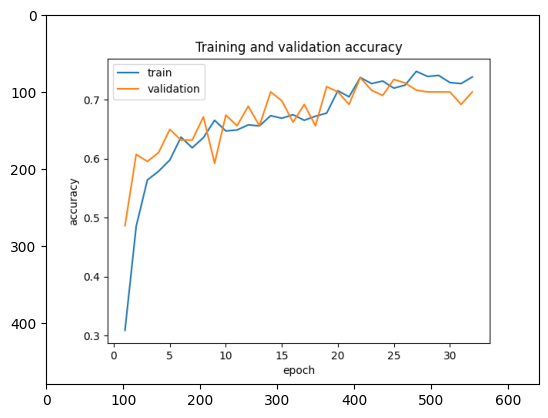

In [13]:
import matplotlib.image as mpimg
img_acc = mpimg.imread('/kaggle/working/training_graphs_and_logs/CNNForFruits_epochs_50/accuracy.png')
imgplot = plt.imshow(img_acc)
plt.show()

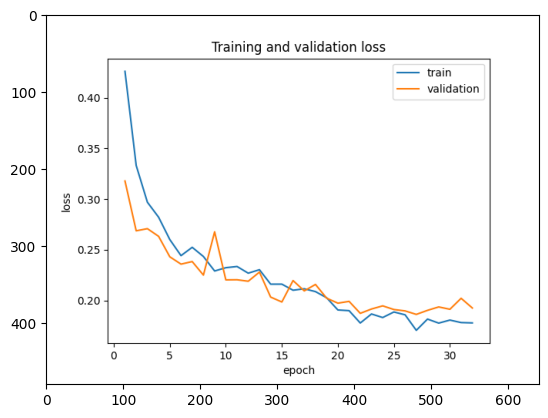

In [14]:
img_loss = mpimg.imread('/kaggle/working/training_graphs_and_logs/CNNForFruits_epochs_50/loss.png')
imgplot = plt.imshow(img_loss)
plt.show()

# Testing

In [15]:
import numpy as np
import random
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torchinfo import summary
from sklearn.metrics import confusion_matrix, classification_report

def evaluate(model, num_epochs, test_loader, additional_text='', augmentation='', model_structure=False):

    load_model('./trained_models', model, number_of_epochs=num_epochs, additional_text=additional_text,
               augmentation=augmentation)

    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Evaluation metrics:\n")

    print('Accuracy: {:.2f}%'.format(accuracy * 100))
    # print('Precision: {:.2f}'.format(precision))
    # print('Recall: {:.2f}'.format(recall))
    # print('F1 Score: {:.2f}'.format(f1))

    # print out the number of parameters
    # total_params = sum(p.numel() for p in model.parameters())
    # print(f"Total number of parameters: {total_params}")

    # print out the model structure
    # if model_structure:
    #     summary(model=model,
    #             # (batch_size, color_channels, height, width)
    #             input_size=(64, 3, 32, 32),
    #             col_names=["input_size", "output_size", "num_params"],
    #             col_width=20,
    #             row_settings=["var_names"]
    #     )
        # print(model.eval())

    return y_true, y_pred

if __name__ == "__main__":

    model = CNNForFruits(NUMBER_OF_CLASSES)

    # Init the test-loader
    _, _, test_loader, class_labels, dm_dataset = get_dataloaders()
    
#     model = resnet50(weights="IMAGENET1K_V1")

#     num_features = model.fc.in_features
#     num_classes = len(dm_dataset.categories()[dm.AnnotationType.label])

#     model.fc = torch.nn.Linear(num_features, num_classes)

    # determine the evaluation metrics
    true_labels, predictions = evaluate(model, NUMBER_OF_EPOCHS, test_loader, augmentation='aug', model_structure=True)

Dataset
	size=1655
	source_path=/kaggle/working/fruits-dataset-for-classification
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=1655
	annotations_count=1655
subsets
	test: # of items=166, # of annotated items=166, # of annotations=166, annotation types=['label']
	train: # of items=1158, # of annotated items=1158, # of annotations=1158, annotation types=['label']
	val: # of items=331, # of annotated items=331, # of annotations=331, annotation types=['label']
infos
	categories
	label: ['fresh_peaches', 'fresh_pomegranates', 'fresh_strawberries', 'rotten_peaches', 'rotten_pomegranates', 'rotten_strawberries']

1158
331
166


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Evaluation metrics:

Accuracy: 71.69%


**Create confusion matrix**

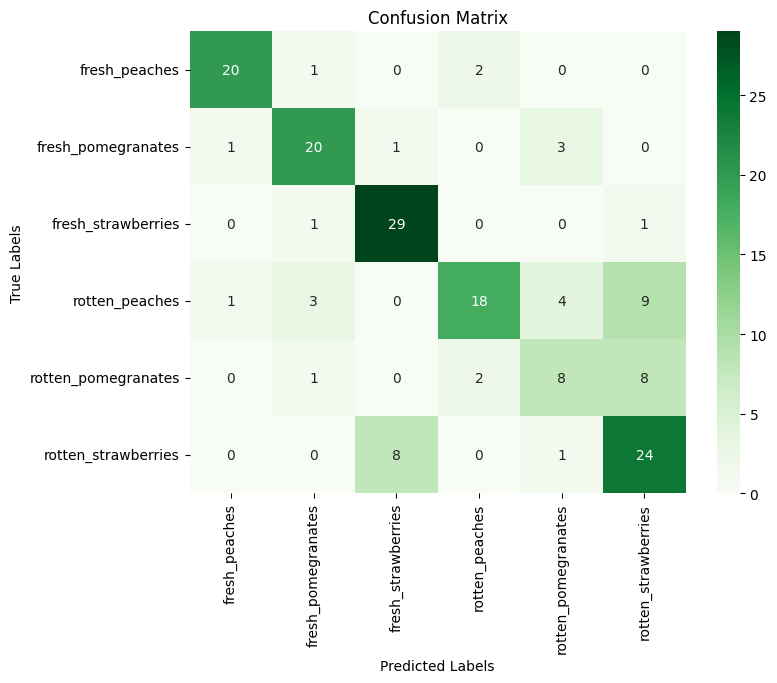

In [16]:
# Create the confusion matrix
cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Create classification report**

In [17]:
# Create classification report
report = classification_report(true_labels, predictions)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.77      0.80      0.78        25
           2       0.76      0.94      0.84        31
           3       0.82      0.51      0.63        35
           4       0.50      0.42      0.46        19
           5       0.57      0.73      0.64        33

    accuracy                           0.72       166
   macro avg       0.72      0.71      0.71       166
weighted avg       0.73      0.72      0.71       166



**Display some test images with their actual and predicted label**

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

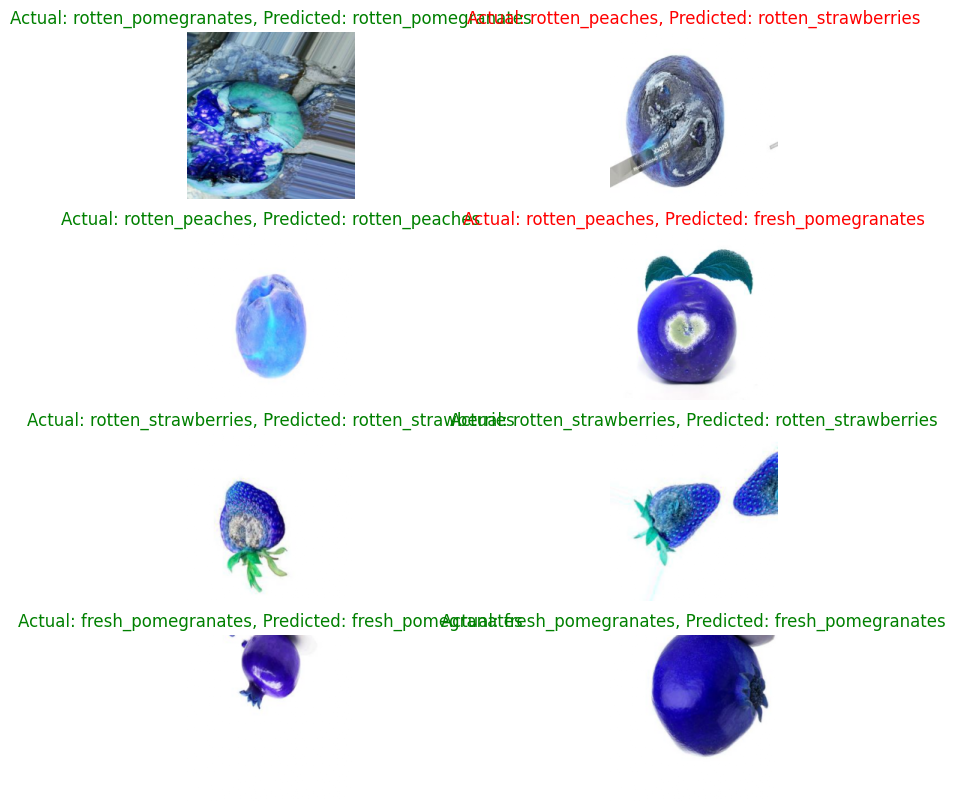

In [18]:
def display_random_predictions(model, num_epochs ,test_loader, class_labels, num_images=8, additional_text='', augmentation=''):
    load_model('./trained_models', model, number_of_epochs=num_epochs, additional_text=additional_text, augmentation=augmentation)
    # set model to evaluation mode
    model.eval()

    # get the total number of images in the test set
    total_images = len(test_loader.dataset)

    # randomly select 6 indices from the test set
    selected_indices = random.sample(range(total_images), num_images)

    images_so_far = 0
    # create a set of subplots in a grid, the first param is number of rows, the second param is the number of columns
    fig, axs = plt.subplots(num_images // 2, 2, figsize=(10, 10))

    with torch.no_grad():
        for i, data in enumerate(test_loader):
            images, labels = data
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            # images is a tensor with shape (batch_size, channels, height, width)
            # images.size()[0] is the number of images in the batch
            for j in range(images.size()[0]):
                # exit the loop when the desired number of images is reached
                if images_so_far >= num_images:
                    break

                # Check if the current index is in the randomly selected indices
                if i * test_loader.batch_size + j in selected_indices:
                    #  accesses a specific subplot in the grid of subplots
                    ax = axs[images_so_far // 2, images_so_far % 2]
                    # turns of the axis
                    ax.axis('off')
                    #  sets the title of the subplot
                    # sets the title of the subplot with actual and predicted labels
                    actual_label = class_labels[labels[j].item()]
                    predicted_label = class_labels[preds[j].item()]

                    # Set the title color based on match or mismatch
                    title_color = 'green' if actual_label == predicted_label else 'red'

                    ax.set_title(f'Actual: {actual_label}, Predicted: {predicted_label}', color=title_color)

                    # convert the image tensor to NumPy array and transpose
                    img = np.transpose(images.cpu().data[j].numpy(), (1, 2, 0))

                    # # unnormalize if normalization was applied during data loading
                    # img = img * np.array(config.MEAN) + np.array(config.STD)

                    # show the image in the subplot
                    ax.imshow(img)
                    # counting the processed images
                    images_so_far += 1

    # after all show the plot
    plt.show();


# Try the model on the testing dataset
display_random_predictions(model, NUMBER_OF_EPOCHS, test_loader, class_labels, augmentation='aug')